# Sydney house prices: Are they really getting more expensive? <img style="float: right;" img src="https://i0.wp.com/www.maxilife.com.au/wp-content/uploads/2017/06/house-dollar-seesaw.png?zoom=2&fit=256%2C256" width="150"> 


## Contents: 

#### 1. Objective, method and source
   * 1.1 Objective
   * 1.2 Method
   * 1.3 Source

#### 2. Sydney property data
   * 2.1 Importing, reading and cleaning
   * 2.2 Data dictionary for property
   * 2.3 Sorting and separating
   * 2.4 Plotting
   * 2.5 Condensing
   * 2.6 Calculating growth rates
   
#### 3. NSW wage data
   * 3.1 Importing, reading and cleaning
   * 3.2 Data dictionary for wages
   * 3.3 Sorting and separating
   * 3.4 Plotting
   * 3.5 Condensing
   * 3.6 Calculating growth rates

#### 4. Sydney CPI data
   * 4.1 Importing, reading and cleaning
   * 4.2 Data dictionary for wages
   * 4.3 Sorting and separating
   * 4.4 Plotting
   * 4.5 Calculating growth rates
   
#### 5. Comparison
   * 5.1 Time series comparison
   * 5.2 Bar chart comparison
       * 5.2.1 Simple average growth
       * 5.2.2 Per annum growth
       * 5.2.3 Total growth
   
#### 6. Conclusion

## 1. Objective, method and source

### 1.1: Objective

- The objective of this report is to answer the question, are house prices in Sydney really getting more expensive? And if they are, how much more expensive have they gotten compared to what we're earning and the price of consumer products.

### 1.2: Method

- To achieve this objective I will use exploratory data analysis on three different CSV files from the Australian Bureau of Statistics (ABS) that covers house prices, wage prices and consumer prices.


- By the end of this report I will use the data contained in the CSV files to generate a line chart to compare how housing, wages and consumer goods have grown in comparison to each other. I will also calculate their total growth rate as a simple average growth, a per annum growth and a total growth and then plot those in a bar chart to give greater insight into how they've grown. 


- The time period I have chosen for this analysis is from March 2009 to March 2019 at a quarterly frequency.

### 1.3: Source

- As mentioned previously, the CSV files will be from the ABS, specifically the ABS.STAT (<http://stat.data.abs.gov.au/>) website. It offers data on many different aspects of the Australian economy. 

## 2. Sydney property data

### 2.1: Importing, reading and cleaning
- To start, I am importing the pandas module, along with numpy, matplotlib and the mean module from statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

- Once that is done I will read in the first CSV called 'property_index'.

In [2]:
try:
    res_df = pd.read_csv('../final_project/data/property_indexd.csv')
    
except FileNotFoundError:
    print('Good friend, you seem the file name you entered doesn\'t seem to exist, would you kindly try again? :)')

Good friend, you seem the file name you entered doesn't seem to exist, would you kindly try again? :)


- Seems I have accidentally made a typo on the filename, luckily I have a try/except block that prints out a friendly message informing me of this fact rather than a big scary error message.

In [47]:
try:
    res_df = pd.read_csv('../final_project/data/property_index.csv')
    
except FileNotFoundError:
    print('Good friend, you seem to have entered in the wrong file name, would you kindly try again :) ?')

- There we go, much better! This is directly from the ABS, so I suspect there will be a lot to change. To check this I will look at the columns and the first five rows of the dataframe.

In [4]:
res_df.columns

Index(['MEASURE', 'Measure', 'PROP_TYPE', 'Property type', 'ASGS_2011',
       'Region', 'FREQUENCY', 'Frequency', 'TIME', 'Time', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [48]:
res_df.shape

(3321, 13)

In [5]:
res_df.head()

,MEASURE,Measure,PROP_TYPE,Property type,ASGS_2011,Region,FREQUENCY,Frequency,TIME,Time,Value,Flag Codes,Flags
0,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2009-Q1,Mar-09,-3.7,NaN,NaN
1,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2009-Q2,Jun-09,1.6,NaN,NaN
2,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2009-Q3,Sep-09,11.4,NaN,NaN
3,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2009-Q4,Dec-09,19.8,NaN,NaN
4,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2010-Q1,Mar-10,25.2,NaN,NaN


- As we can see there are a lot of columns, and the dataframe itself is pretty messy and hard to read. 


- To start, I will delete the columns that I don't need to get the dataframe down to something much easier to read.

    - The 'Flag Codes' and 'Flags' are not needed as they have no value. 
    
    - There are also numbers attached that correspond to a string from each column. I can remove the string columns and write out what they correspond to in a data dictionary. The only one I'll leave is the 'Region' column as the ABS' code for that is a bit long and I might as well just keep the string. 
    
    - After deletion, what I should be left with is just the encoded columns along with region, time and value.

In [6]:
res_df = res_df.drop(['Measure','Property type','ASGS_2011','FREQUENCY','Frequency','TIME','Flag Codes','Flags'], axis=1)
res_df.head(5)

,MEASURE,PROP_TYPE,Region,Time,Value
0,3,3,Greater Melbourne,Mar-09,-3.7
1,3,3,Greater Melbourne,Jun-09,1.6
2,3,3,Greater Melbourne,Sep-09,11.4
3,3,3,Greater Melbourne,Dec-09,19.8
4,3,3,Greater Melbourne,Mar-10,25.2


- As you can see this new dataframe is much easier to read!

### 2.2: Data Dictionary for property

* Measures:

    * 1 = Index Number
    * 2 = Percentage change from previous quarter
    * 3 = Percentage change from corresponding quarter of the previous year
 
 
* Property types:
    
    * 1 = Attached dwellings
    * 2 = Established houses
    * 3 = Residential property

### 2.3: Sorting and separating

- Because the ABS separates the time series data based on region I will need to condense this data frame further. For the purposes of this project, I will only be concerned with the Greater Sydney region. My filter for region will be = 'Greater Sydney'. 


- As you can see in the dictionary, there are three different measures. For this project I will only be using the index values, as I can derive all growth from those. So my filter for measure will be = 1. 


- There are three different property types: Attached dwellings, estbalished houses and residential property. I have created new dataframes separated by these property types so I can plot them later on to compare how they've grown over the last 10 years. 

In [7]:
#Attached dwellings
syd_prop1 = res_df[(res_df['Region'] == 'Greater Sydney') & (res_df['MEASURE'] == 1) & (res_df['PROP_TYPE'] == 1)]
#Established houses
syd_prop2 = res_df[(res_df['Region'] == 'Greater Sydney') & (res_df['MEASURE'] == 1) & (res_df['PROP_TYPE'] == 2)]
#Residential property
syd_prop3 = res_df[(res_df['Region'] == 'Greater Sydney') & (res_df['MEASURE'] == 1) & (res_df['PROP_TYPE'] == 3)]

### 2.4: Plotting

- Now that I have three workable dataframes, I am now ready to start plotting them.


- Before I do that however, I will import the 'toolbox' class from my 'swiss' module (for Swiss army knife). This module that I wrote, contains two classes 'toolbox' and 'growth_calculator'. For this section I will only need 'toolbox'. 
    - 'toolbox' contains a variety of functions to help in cleaning up the data in my dataframes, I will go into further detail on them as we go on.

In [8]:
from swiss import toolbox as tb

- Now it's time to plot the dataframes' respective index values on a line graph. Because i'm plotting multiple series, I will use a for loop to plot each dataframe's 'Time' and 'Value' data, with 'Time' on the x-axis and 'Value' on the y-axis.


- Because the original graph's x-axis was far too messy, I cleaned up the x-axis label by first applying the 'tb.axis_cleaner' method. This method from the 'toolbox' class removes any entry that doesn't begin the 'Mar', making the label much easier to read. (For more on what exactly this method does, consult the docstring).


- You can also see that I've manually labelled the legend. This was done by finding out three different values at a point in time, and matching them to the line on the graph. You can see how I found this out in the block of code directly below. 

In [9]:
v1 = syd_prop1['Value'].iloc[40]
v2 = syd_prop2['Value'].iloc[40]
v3 = syd_prop3['Value'].iloc[40]
print('For Mar-19:\nAttached dwellings was',v1, '\nEstablished houses was', v2, '\nResidential property was',v3, '\nMax value is',max(v1,v2,v3))

For Mar-19:
Attached dwellings was 145.6 
Established houses was 158.4 
Residential property was 154.2 
Max value is 158.4


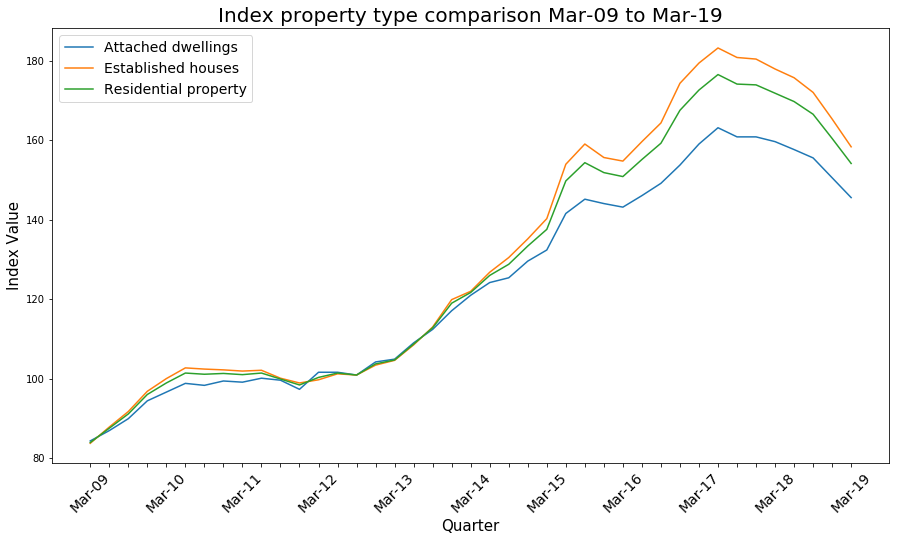

In [10]:
for frame in [syd_prop1, syd_prop2, syd_prop3]:
    ax1 = plt.plot(frame['Time'], frame['Value'])
axis1 = ax1[0].axes
#The 'axis_cleaner' method imported from the 'swiss' module contained in the 'toolbox' class reduces the labels on
#the x-axis to just show every March. 
axis1.set_xticklabels(syd_prop1['Time'].apply(tb.axis_cleaner,1),rotation = 45,fontsize = 14)
plt.ylabel('Index Value',fontsize = 15)
plt.xlabel('Quarter',fontsize = 15)
plt.title('Index property type comparison Mar-09 to Mar-19',fontsize = 20)
axis1.figure.set_size_inches(15,8)

plt.legend(['Attached dwellings','Established houses','Residential property'],fontsize = 14)

- Our first graph above shows that prices were pretty much consistent for attached dwellings, established houses and residential property, but in late 2013 they began to deviate while still rising and falling with each other. We can see that estbalished houses have risen far faster than attached dwellings, suggesting that a freestanding house has become relatively more expensive than other property types. 

### 2.5: Condensing

- Because we ultimately want to compare property prices to wages and consumer prices, I want just one single line that incorporates the data above to compare, otherwise the end result will be very confusing. 


- To do this, I will take an average of the three prices at each quarter to give me a single line series which will follow the average property price over the last 10 years.


- Below I've created a new dataframe that takes in the values of the three separate dataframes I created above, which then creates a new column that takes the average of those three.

In [11]:
#Creating a new dataframe that merges the values of the different property types, then making a new column that
#takes the average at teach column
prop_df = pd.DataFrame(data={'prop1': syd_prop1['Value'].values,
                        'prop2': syd_prop2['Value'].values,
                        'prop3': syd_prop3['Value'].values,
                       })
prop_df['Average'] = prop_df.mean(axis=1)

- Because I am plotting against time, I will take the 'Average' column from the above 'prop_df' and insert it into a copy of one of the above 'syd_prop' dataframes. This will allow me to easily plot the average value against time. 


- You will notice that i've applied two functions to the new column in this dataframe. 'tb.formatter' is a method from the 'toolbox' class that simply reduces the input to two decimal places (consult the docstring for 'tb.formatter' for more information on what this method exactly does).


- Because the output was an object initially, I had to apply a 'float' function so I could properly plot it later on.

In [12]:
#Now we take that average column and place it into a formatted dataframe so we can plot the date/value
syd_prop_avg = syd_prop1.copy()
#Don't need PROP_TYPE anymore so I'm getting rid of this column
syd_prop_avg = syd_prop_avg.drop(['PROP_TYPE'],axis=1)
syd_prop_avg['Value'] = prop_df['Average'].values
#The 'formatter' method, imported from the 'swiss' module from the 'toolbox' class.
syd_prop_avg['Value'] = syd_prop_avg['Value'].copy().apply(tb.formatter,1)
syd_prop_avg['Value'] = syd_prop_avg['Value'].copy().apply(float,1)
syd_prop_avg.head()

,MEASURE,Region,Time,Value
1189,1,Greater Sydney,Mar-09,83.97
1190,1,Greater Sydney,Jun-09,87.40
1191,1,Greater Sydney,Sep-09,90.90
1192,1,Greater Sydney,Dec-09,95.73
1193,1,Greater Sydney,Mar-10,98.50


- Now that we have our new dataframe, it's simply a matter of plotting it. Same as before, we are cleaning up the x-axis with 'axis_cleaner'.

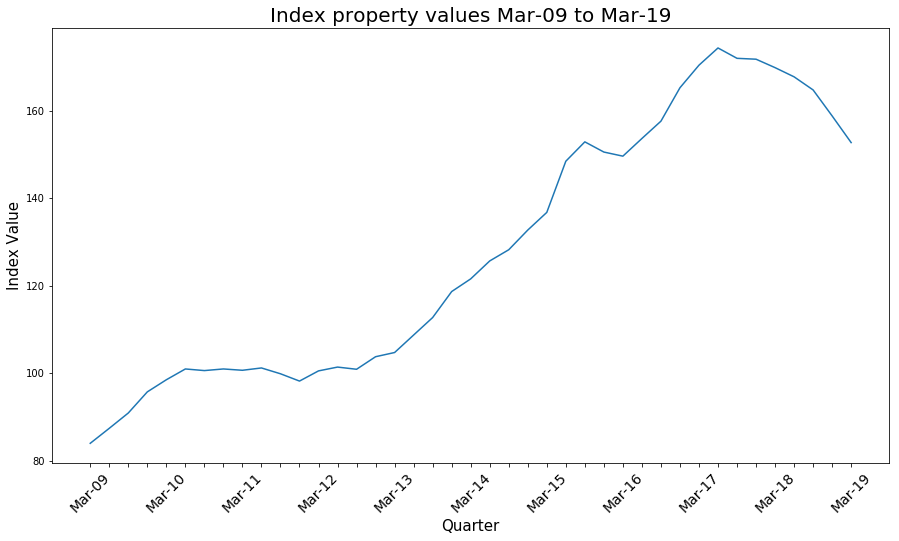

In [13]:
ax2 = plt.plot(syd_prop_avg['Time'], syd_prop_avg['Value'])
axis2 = ax2[0].axes
axis2.set_xticklabels(syd_prop1['Time'].apply(tb.axis_cleaner,1),rotation = 45,fontsize = 14)
plt.ylabel('Index Value',fontsize = 15)
plt.xlabel('Quarter',fontsize = 15)
plt.title('Index property values Mar-09 to Mar-19',fontsize = 20)
axis2.figure.set_size_inches(15,8)

- Now with our first finished graph, we can see that Sydney house prices on average have accelerated their growth in the past 5-6 years. From early 2017 this growth reversed, yet the magnitude of growth previously shows that despite this shrinkage, house prices are still relatively far more expensive than they were 10 years ago.

### 2.6: Calculating growth rates

- Now that we have our two graphs, we do need a bit more information if we are to compare it to our wage and consumer price data and graph that will follow. 


- The average growth rate of the index is useful, but more useful to people is the per annum growth rate which has a bit of a different (and more complex) calculation method. To give a complete story, I'll also include the total growth.


- To do this I will use my 'growth_calculator' class which contains methods to get the average growth, per annum growth and a rebalanced index list. This rebalanced index list is different to the index list provided by the ABS as it's rebalanced to 100 starting from March 2009. The reason I want this, is to accurately show how housing, wages and consumer products have grown from the same point.

In [14]:
from swiss import growth_calculator as gc

- To output the average growth and per annum growth, I simply instantiate the class with the value I want to pass in. In this case it's the original average index list I had generated above. Once that's passed in the 'get_avg_growth' and 'get_pa_growth' methods do the rest. (For more information on these methods, consult the docstring).


- I will also generate a total growth starting from March 2009 to March 2019 using the 'generate_growth_list' method in the 'toolbox' class. This method can either generate one single growth figure or a list of growth figures, it's flexible because it uses *args. Below I will store the total growth figure using this method.


- Now it's just a matter of storing these variables for later, and outputting them as a statement for reference. 

In [15]:
prop_avg_growth = gc(syd_prop_avg['Value']).get_avg_growth()
prop_pa_growth = gc(syd_prop_avg['Value']).get_pa_growth()

#Total growth calculated from first to last point on the index in this case between index '0' and '40'.
prop_tot_growth = tb.generate_growth_rate_list(syd_prop_avg['Value'].iloc[0],syd_prop_avg['Value'].iloc[40])

print ("The simple average growth of property prices between Mar-09 and Mar-19 was {0:.2f}%.".format(prop_avg_growth*100))
print("The per annum growth since Mar-09 was {0:.2f}%.".format(prop_pa_growth*100))
#Indexing '0' because the method returns a single entry list, so to be formatted correctly it must be indexed.
print("The total growth since Mar-09 was {0:.2f}%.".format(prop_tot_growth[0]*100))

The simple average growth of property prices between Mar-09 and Mar-19 was 1.54%.
The per annum growth since Mar-09 was 6.33%.
The total growth since Mar-09 was 81.89%.


- Hooray! We have everything we need now for our property data, we can already make some observations based on what we've got already, but to complete the full story we will need to compare it to our wage price data.

## 3. NSW wage data

### 3.1: Importing, reading and cleaning

- I will follow the same process as I did for the above property data, adjusting to suit the different layout as needed. Below I've read in the second csv, 'wage_index.csv'

In [46]:
try:
    wage_df = pd.read_csv('../final_project/data/wage_index.csv')
    
except FileNotFoundError:
    print('Good friend, you seem the file name you entered doesn\'t seem to exist, would you kindly try again? :)')

- Similar to the property data, there will be many columns to change and the data will need to be manipulated so it's boiled down to something more user friendly.

In [17]:
wage_df.columns

Index(['MEASURE', 'Measure', 'INDEX', 'Index type', 'SECTOR', 'Sector',
       'INDUSTRY', 'Industry', 'REGION', 'Region', 'TSEST', 'Adjustment type',
       'FREQUENCY', 'Frequency', 'TIME', 'Time', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [49]:
wage_df.shape

(3321, 19)

In [18]:
wage_df.head()

,MEASURE,Measure,INDEX,Index type,SECTOR,Sector,INDUSTRY,Industry,REGION,Region,TSEST,Adjustment type,FREQUENCY,Frequency,TIME,Time,Value,Flag Codes,Flags
0,1,Index number,THRPEB,Total hourly rates of pay excluding bonuses,1,Private,-,All industries,1,New South Wales,10,Original,Q,Quarterly,2009-Q1,Mar-09,100.4,NaN,NaN
1,1,Index number,THRPEB,Total hourly rates of pay excluding bonuses,1,Private,-,All industries,1,New South Wales,10,Original,Q,Quarterly,2009-Q2,Jun-09,101.0,NaN,NaN
2,1,Index number,THRPEB,Total hourly rates of pay excluding bonuses,1,Private,-,All industries,1,New South Wales,10,Original,Q,Quarterly,2009-Q3,Sep-09,101.8,NaN,NaN
3,1,Index number,THRPEB,Total hourly rates of pay excluding bonuses,1,Private,-,All industries,1,New South Wales,10,Original,Q,Quarterly,2009-Q4,Dec-09,102.2,NaN,NaN
4,1,Index number,THRPEB,Total hourly rates of pay excluding bonuses,1,Private,-,All industries,1,New South Wales,10,Original,Q,Quarterly,2010-Q1,Mar-10,103.2,NaN,NaN


- The wage dataframe is even messier than the property dataframe! I want to get it to where it's just showing the encoded 'MEASURE', 'SECTOR' and 'REGION' columns, with the respective 'Time' and 'Value'. I have followed the same process as I did for the property index.

In [19]:
wage_df = wage_df.drop(['Measure','INDEX','Index type','Sector','INDUSTRY','Industry','Region','TSEST','Adjustment type','FREQUENCY','Frequency','TIME','Flag Codes','Flags'], axis=1)
wage_df.head()

,MEASURE,SECTOR,REGION,Time,Value
0,1,1,1,Mar-09,100.4
1,1,1,1,Jun-09,101.0
2,1,1,1,Sep-09,101.8
3,1,1,1,Dec-09,102.2
4,1,1,1,Mar-10,103.2


- There we go, much better! As you can see, very similar to the property dataframe, only that everything is now encoded. The ABS encoded each region in a much better way, so I've removed any string column.

### 3.2: Data Dictionary for wages:
* Measures:

    * 1 = Index number
    * 2 = Percentage change from previous quarter
    * 3 = Percentage change from corresponding quarter of the previous year
 
 
* Sectors:
    
    * 1 = Public Sector
    * 2 = Private Sector
    * 3 = All Sectors

* Regions:
    
    * 0 = Australia
    * 1 = New South Wales
    * 2 = Victoria
    * 3 = Queensland
    * 4 = South Australia
    * 5 = Western Australia
    * 6 = Tasmania
    * 7 = Northern Territory
    * 8 = ACT

### 3.3: Sorting and separating

- As we can see, there are a few key differences to the property dataframe. While the 'Measures' remain the same, we now have 'Sectors' and 'Regions' (instead of cities). The ABS only has wage data per state, so we will be using that to compare to 'Greater Sydney'.


- One thing that I noticed in the ABS csv, was that the index for 'Sectors' had 7 as the index for 'All Sectors'. For consistency I decided to change it to 3 by applying the 'tb.index_fixer' method from the 'toolbox' class. This simply converts any 7 it finds to a 3. (For more information consult the tb.index_fixer docstring).

In [20]:
wage_df['SECTOR'] = wage_df['SECTOR'].copy().apply(tb.index_fixer,1)

In [21]:
wage_df.head()

,MEASURE,SECTOR,REGION,Time,Value
0,1,1,1,Mar-09,100.4
1,1,1,1,Jun-09,101.0
2,1,1,1,Sep-09,101.8
3,1,1,1,Dec-09,102.2
4,1,1,1,Mar-10,103.2


- Now that we have a workable dataframe, it's time to separate them again. 


- This is the exact same process as I did for properties, only I am plotting the different sectors against each other intitially. So the 'REGION' and 'MEASURE' filter will be exactly the same for each dataframe, only 'SECTOR' will be different. 

In [22]:
#Public sector
nsw_sec1 = wage_df[(wage_df['REGION'] == 1) & (wage_df['MEASURE'] == 1) & (wage_df['SECTOR'] == 1)]
#Private sector
nsw_sec2 = wage_df[(wage_df['REGION'] == 1) & (wage_df['MEASURE'] == 1) & (wage_df['SECTOR'] == 2)]
#All sectors
nsw_sec3 = wage_df[(wage_df['REGION'] == 1) & (wage_df['MEASURE'] == 1) & (wage_df['SECTOR'] == 3)]

### 3.4: Plotting

- Similar to before (for more details refer to 2.4), I will clean up the x-axis of my graph with 'tb.axis_cleaner'. The end result is shown below. 

In [23]:
v1 = nsw_sec1['Value'].iloc[40]
v2 = nsw_sec2['Value'].iloc[40]
v3 = nsw_sec3['Value'].iloc[40]
print('For Mar-19:\nPublic sector was',v1, '\nPrivate sector', v2, '\nAll sectors was',v3, '\nMax value is',max(v1,v2,v3))

For Mar-19:
Public sector was 130.0 
Private sector 133.6 
All sectors was 130.8 
Max value is 133.6


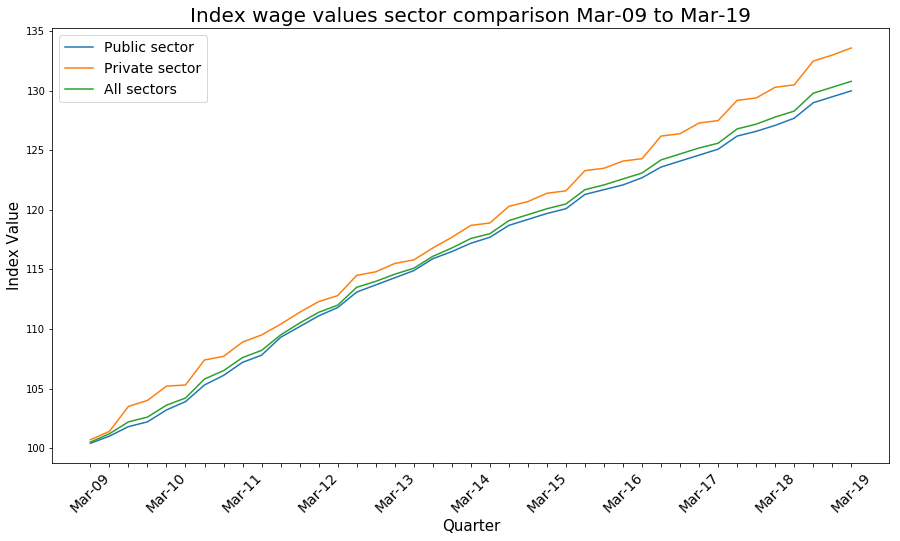

In [24]:
for frame in [nsw_sec1, nsw_sec2, nsw_sec3]:
    ax3 = plt.plot(frame['Time'], frame['Value'])
axis3 = ax3[0].axes
axis3.set_xticklabels(nsw_sec1['Time'].apply(tb.axis_cleaner,1),rotation = 45,fontsize = 14)
plt.ylabel('Index Value',fontsize = 15)
plt.xlabel('Quarter',fontsize = 15)
plt.title('Index wage values sector comparison Mar-09 to Mar-19',fontsize = 20)
axis3.figure.set_size_inches(15,8)

#See block above to find out how I manually assigned the legend labels.
plt.legend(['Public sector','Private sector','All sectors'],fontsize = 14)

- Our second graph shows that wages have also grown considerably since March 2009. It also shows that both the public and private sector have grown consistently with each other, with the private sector's growth slightly outpacing the public sector's growth towards the end of the time period. 

### 3.5: Condensing

- Like what we did with properties, we want to condense this 3 series graph into one. 


- To do this, I am following the exact same process as I did before (please consult 2.5), however I am only taking an average of the Public and Private sector.

In [25]:
#Creating a new dataframe that merges the values of the different sectors, then making a new column that
#takes the average at teach column
avg_wage_df = pd.DataFrame(data={'sec1': nsw_sec1['Value'].values,
                                 'sec2': nsw_sec2['Value'].values,
                        })
avg_wage_df['Average'] = avg_wage_df.mean(axis=1)
avg_wage_df.head()

,sec1,sec2,Average
0,100.4,100.7,100.55
1,101.0,101.4,101.20
2,101.8,103.5,102.65
3,102.2,104.0,103.10
4,103.2,105.2,104.20


- Similar to before, I'm taking the new 'Average' column and inserting it into a one of the new dataframes I created so I can easily plot it against time. 


- For some reason the average values were already formatted to two decimal places, so I simply just have to convert them to a float and it's ready to be plotted.

In [26]:
#Now we take that average column and place it into a formatted dataframe so we can plot the date/value
nsw_wage_avg = nsw_sec1.copy()
nsw_wage_avg = nsw_wage_avg.drop(['SECTOR'],axis=1)
nsw_wage_avg['Value'] = avg_wage_df['Average'].values
nsw_wage_avg['Value'] = nsw_wage_avg['Value'].copy().apply(float,1)
nsw_wage_avg.head()

,MEASURE,REGION,Time,Value
0,1,1,Mar-09,100.55
1,1,1,Jun-09,101.20
2,1,1,Sep-09,102.65
3,1,1,Dec-09,103.10
4,1,1,Mar-10,104.20


- With the completed dataframe it's just a matter of plotting it and cleaning up the x-axis label with 'axis_cleaner'.

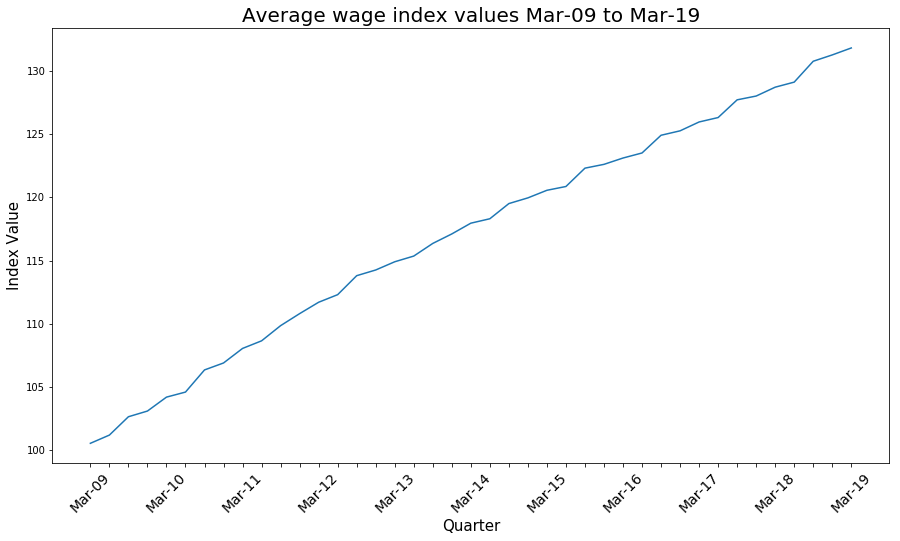

In [27]:
ax4 = plt.plot(nsw_wage_avg['Time'], nsw_wage_avg['Value'])
axis4 = ax4[0].axes
axis4.set_xticklabels(nsw_sec1['Time'].apply(tb.axis_cleaner,1),rotation = 45,fontsize = 14)
plt.ylabel('Index Value',fontsize = 15)
plt.xlabel('Quarter',fontsize = 15)
plt.title('Average wage index values Mar-09 to Mar-19',fontsize = 20)
axis4.figure.set_size_inches(15,8)

- Now with our finished product, we have a good idea of how wages have grown overall since March 2009. We can see it's a much more consistent growth with a lot less volatility than property prices. What will be interesting is comparing the growth rates.

### 3.6: Calculating growth rates

- Similar to property prices (please consult 2.6 for more information), we are storing our wage per annum and average growth values to use later, then printing out the variables below for reference.


- Just looking at how the growth rates below compare to the property growth rates, we can already see a huge difference.

In [28]:
wage_avg_growth = gc(nsw_wage_avg['Value']).get_avg_growth()
wage_pa_growth = gc(nsw_wage_avg['Value']).get_pa_growth()

#Total growth calculated from first to last point on the index in this case between index '0' and '40'.
wage_tot_growth = tb.generate_growth_rate_list(nsw_wage_avg['Value'].iloc[0],nsw_wage_avg['Value'].iloc[40])

print ("The simple average growth of wages between Mar-09 and Mar-19 was {0:.2f}%.".format(wage_avg_growth*100))
print("The per annum growth since Mar-09 was {0:.2f}%.".format(wage_pa_growth*100))

#Indexing '0' because the method returns a single entry list, so to be formatted it must be indexed.
print("The total growth since Mar-09 was {0:.2f}%.".format(wage_tot_growth[0]*100))

The simple average growth of wages between Mar-09 and Mar-19 was 0.68%.
The per annum growth since Mar-09 was 2.81%.
The total growth since Mar-09 was 31.08%.


## 4. Sydney CPI data

### 4.1: Importing, reading and cleaning

- By now, you're familiar with the process, below is just reading in the 'cpi_index' csv.

In [29]:
try:
    cpi_df = pd.read_csv('../final_project/data/cpi_index.csv')
    
except FileNotFoundError:
    print('Good friend, you seem the file name you entered doesn\'t seem to exist, would you kindly try again? :)')

In [30]:
cpi_df.columns

Index(['MEASURE', 'Measure', 'REGION', 'Region', 'INDEX', 'Index', 'TSEST',
       'Adjustment Type', 'FREQUENCY', 'Frequency', 'TIME', 'Time', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [50]:
cpi_df.shape

(1107, 4)

In [31]:
cpi_df.head()

,MEASURE,Measure,REGION,Region,INDEX,Index,TSEST,Adjustment Type,FREQUENCY,Frequency,TIME,Time,Value,Flag Codes,Flags
0,1,Index Numbers,1,Sydney,10001,All groups CPI,10,Original,Q,Quarterly,2009-Q1,Mar-09,92.5,NaN,NaN
1,1,Index Numbers,1,Sydney,10001,All groups CPI,10,Original,Q,Quarterly,2009-Q2,Jun-09,92.9,NaN,NaN
2,1,Index Numbers,1,Sydney,10001,All groups CPI,10,Original,Q,Quarterly,2009-Q3,Sep-09,93.9,NaN,NaN
3,1,Index Numbers,1,Sydney,10001,All groups CPI,10,Original,Q,Quarterly,2009-Q4,Dec-09,94.4,NaN,NaN
4,1,Index Numbers,1,Sydney,10001,All groups CPI,10,Original,Q,Quarterly,2010-Q1,Mar-10,95.2,NaN,NaN


- While not as messy as the previous two, there are still a lot of columns that aren't needed for what I'm after. My aim is to reduce this dataframe into just the index values and the regions.

In [32]:
cpi_df = cpi_df.drop(['Measure','Region','INDEX','Index','TSEST','Adjustment Type','FREQUENCY','Frequency','TIME','Flag Codes','Flags'], axis=1)
cpi_df.head()

,MEASURE,REGION,Time,Value
0,1,1,Mar-09,92.5
1,1,1,Jun-09,92.9
2,1,1,Sep-09,93.9
3,1,1,Dec-09,94.4
4,1,1,Mar-10,95.2


- This dataframe is much smaller with only 'MEASURE', 'REGION', 'Time', and 'Value' being included.

### 4.2: Data Dictionary for Sydney CPI data:

* Measures:

    * 1 = Index number
    * 2 = Percentage change from previous quarter
    * 3 = Percentage change from corresponding quarter of the previous year
 
* Regions:
    
    * 1 = Sydney
    * 2 = Melbourne
    * 3 = Brisbane
    * 4 = Adelaide
    * 5 = Perth
    * 6 = Hobart
    * 7 = Darwin
    * 8 = Canberra
    
### 4.3: Sorting and separating:

- For this dataframe we are not interested in plotting different sectors/property types. There was an option to compare across different types of consumer prices indices (e.g. food, travel, entertainment etc.), but the number of choices were far too numerous for the scope of this project. As a result I've just only selected the CPI for all goods to give an overall measure of how the CPI has grown in the past 10 years.


- Below we are only creating one dataframe for the measure being index values only, and the region being Sydney.
    

In [33]:
#CPI index for Sydney only
cpi_syd = cpi_df[(cpi_df['REGION'] == 1) & (cpi_df['MEASURE'] == 1)]

### 4.4: Plotting

- The plotting process here is much more straight forward as we don't need to take an average or do an initial comparison. 


- Similar to before (consult 2.4 for more details), I am applying the 'axis_cleaner' method to clean up the label of the below graph.

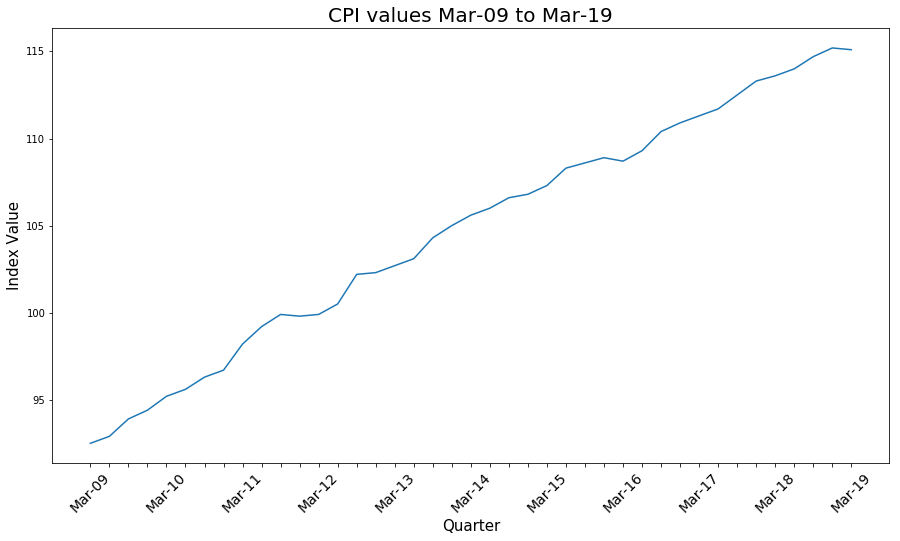

In [34]:
ax5 = plt.plot(cpi_syd['Time'], cpi_syd['Value'])
axis5 = ax5[0].axes
axis5.set_xticklabels(cpi_syd['Time'].apply(tb.axis_cleaner,1),rotation = 45,fontsize = 14)
plt.ylabel('Index Value',fontsize = 15)
plt.xlabel('Quarter',fontsize = 15)
plt.title('CPI values Mar-09 to Mar-19',fontsize = 20)
axis5.figure.set_size_inches(15,8)

- As we can see, the CPI has grown consistently much like wage prices.

### 4.5 Calculating growth rates

- Similar to before (please consult 2.6 for more information), we are storing our CPI per annum, average, and total growth values to use later, then printing out the variables below for reference.


- With these growth rates, we're starting to see that consuer prices have grown much more in-line with wages but still far less than properties.

In [35]:
cpi_avg_growth = gc(cpi_syd['Value']).get_avg_growth()
cpi_pa_growth = gc(cpi_syd['Value']).get_pa_growth()

#Total growth calculated from first to last point on the index in this case between index '0' and '40'.
cpi_tot_growth = tb.generate_growth_rate_list(cpi_syd['Value'].iloc[0],cpi_syd['Value'].iloc[40])

print ("The simple average growth of wages between Mar-09 and Mar-19 was {0:.2f}%.".format(cpi_avg_growth*100))
print("The per annum growth since Mar-09 was {0:.2f}%.".format(cpi_pa_growth*100))

#Indexing '0' because the method returns a single entry list, so to be formatted it must be indexed.
print("The total growth since Mar-09 was {0:.2f}%.".format(cpi_tot_growth[0]*100))

The simple average growth of wages between Mar-09 and Mar-19 was 0.55%.
The per annum growth since Mar-09 was 2.27%.
The total growth since Mar-09 was 24.43%.


## 5. Comparison

### 5.1: Time series comparison

 - Now that we have our property prices, our wage prices and our average consumer prices, we can plot them all on the same graph to compare how they've grown.
     - To plot all the values from March 2009 to March 2019, I will plot them all on a time series line graph as shown below. 
     - To plot the stored per annum, average and total growth values for properties, wages and consumer prices I will use a bar chart.

In [36]:
v1 = syd_prop_avg['Value'].iloc[40]
v2 = nsw_wage_avg['Value'].iloc[40]
v3 = cpi_syd['Value'].iloc[40]
print('For Mar-19:\nProperty was',v1, '\nWages were', v2, '\nCPI was',v3, '\nMax value is',max(v1,v2,v3))

For Mar-19:
Property was 152.73 
Wages were 131.8 
CPI was 115.1 
Max value is 152.73


- For the time series graph, I decided for a more accurate comparison that I will plot each index starting from the same point. In this case the index starts at 100 for properties, wages and consumer prices. 


- Here I am using the 'get_index_list' method from the 'growth_calculator' class, that returns an index list that starts at 100 and applies the growth rates between the two points from the original indices. The point of this is so I can plot everything starting from the same point to really highlight how differently they have grown. (For more information refer to the get_index_list docstring).

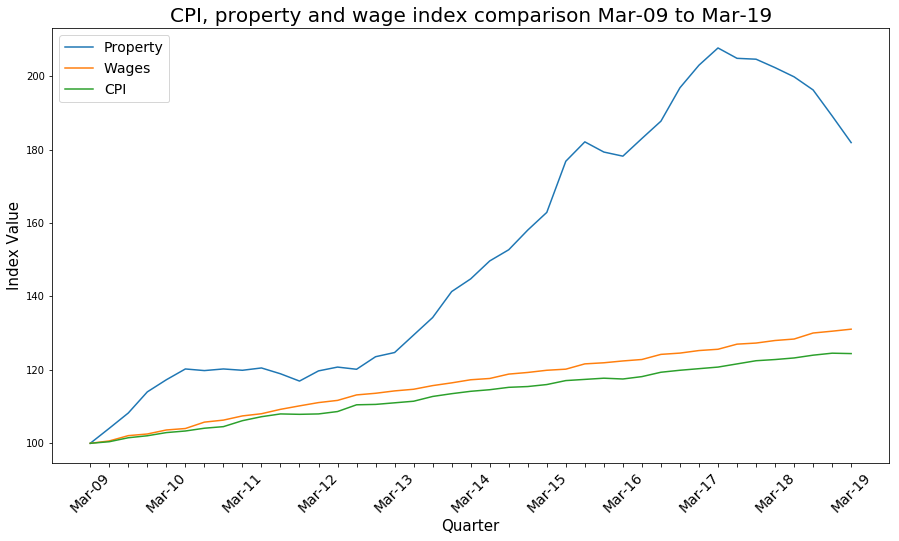

In [37]:
#In this graph I used the index lists starting at 100 to have a more accurate comparison of how these prices
#have grown since Mar-09, this will give a much better idea of how they've grown. 
prop_index = gc(syd_prop_avg['Value']).get_index_list()
wage_index = gc(nsw_wage_avg['Value']).get_index_list()
cpi_index = gc(cpi_syd['Value']).get_index_list()

for value in [prop_index, wage_index, cpi_index]:
    ax6 = plt.plot(syd_prop_avg['Time'], value)
axis6 = ax6[0].axes
axis6.set_xticklabels(nsw_wage_avg['Time'].apply(tb.axis_cleaner,1),rotation = 45,fontsize = 14)
plt.ylabel('Index Value',fontsize = 15)
plt.xlabel('Quarter',fontsize = 15)
plt.title('CPI, property and wage index comparison Mar-09 to Mar-19',fontsize = 20)
axis6.figure.set_size_inches(15,8)

plt.legend(['Property','Wages','CPI'],fontsize = 14)

- As we can see, our suspicions from before are confirmed. Property has indeed far outgrown both wages and consumer prices to a pretty incredible degree. The fact that they all started at the same point in March 2009, and properties ended up far higher than both CPI and wages by March 2019 highlights how huge the growth in properties has been.

### 5.2: Bar chart comparison

- We already know by this point, that properties have far outgrown both consumer prices and wages. But the question remains, by how much exactly?


- To quantify this, I will take the previously stored per annum, average and total growth values from each property, wages and consumer prices and put them into a new dataframe.


- To clean up this dataframe, I have needed to apply the 'tb.formatter' method to reduce the values to 2 decimal places followed by the float function so they are read in as floats so they can be plotted. The initial values have been multiplied by 100 so they can be expressed as a percentage when they are plotted in the bar chart.

In [38]:
#Here we are creating a new dataframe that incorporates the average growth, per annum and total growth of property, 
#wages, and consumer prices. We are doing this for the purpose of easily plotting them later on.
merged_df = pd.DataFrame(data={'Property': [prop_avg_growth*100, prop_pa_growth*100, prop_tot_growth[0]*100],
                               'Wages': [wage_avg_growth*100, wage_pa_growth*100, wage_tot_growth[0]*100],
                               'CPI': [cpi_avg_growth*100, cpi_pa_growth*100, cpi_tot_growth[0]*100]
                        }, index = ['Avg growth (%)','P.a. growth (%)','Total growth (%)'])
merged_df['Property'] = merged_df['Property'].apply(tb.formatter,1).apply(float,1)
merged_df['Wages'] = merged_df['Wages'].apply(tb.formatter,1).apply(float,1)
merged_df['CPI'] = merged_df['CPI'].apply(tb.formatter,1).apply(float,1)
merged_df

,Property,Wages,CPI
Avg growth (%),1.54,0.68,0.55
P.a. growth (%),6.33,2.81,2.27
Total growth (%),81.89,31.08,24.43


- Our merged dataframe now shows us the average growth and per annum growth for property, wages and cpi expressed as a percentage, the only thing that remains is to plot them in a bar chart.

#### 5.2.1: Simple average growth

- The plotting process is quite straight forward, I am simply creating separate bar charts for average growths, per annum growths and total growths. In this section I will deal with average growths.


- You will notice that the in the last line that I'm applying the 'tb.bar_labeller' method from the 'toolbox' class. This method automatically labels each bar with its respective value (for more details see the docstring for tb.bar_labeller).

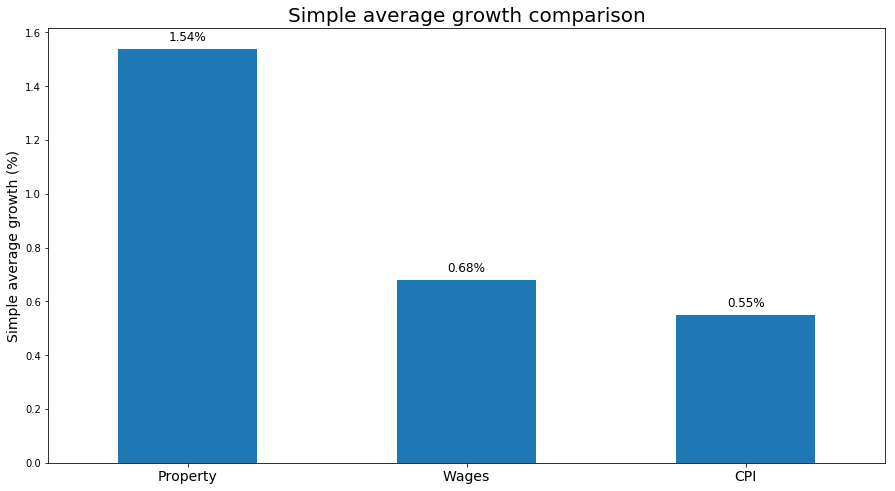

In [39]:
ax7 = merged_df.loc['Avg growth (%)'].plot(kind='bar')
ax7.set_xticklabels(merged_df.columns,rotation=0,fontsize = 14)
plt.ylabel('Simple average growth (%)',fontsize=14)
plt.title('Simple average growth comparison',fontsize = 20)
ax7.figure.set_size_inches(15,8)

#This labels each bar respective to each bar's width and height.
tb.bar_labeller(ax7)

- The bar chart continues what we had suspected before, that properties growth has gone far above wages and consumer prices. The exact amount it outgrew it by is calculated below.

In [40]:
avg_prop2wage = (prop_avg_growth / wage_avg_growth)*100
avg_prop2cpi = (prop_avg_growth / cpi_avg_growth)*100

print("Property outgrew wages by {0:.2f}%.".format(avg_prop2wage))
print("Property outgrew consumer prices by {0:.2f}%.".format(avg_prop2cpi))

Property outgrew wages by 226.67%.
Property outgrew consumer prices by 280.71%.


- Here is the number we've been waiting for. As you can see above, the amount that property outgrew both wages and consumer prices by is very high! Surprisingly, property outgrew consumer prices more than wages, suggesting that while properties have gotten much more expensive, consumer good have grown in line with wages.

#### 5.2.2: Per annum growth


- The next chart to plot is the per annum comparison between properties, wages and consumer prices. This follows the exact same process as the previous bar chart.

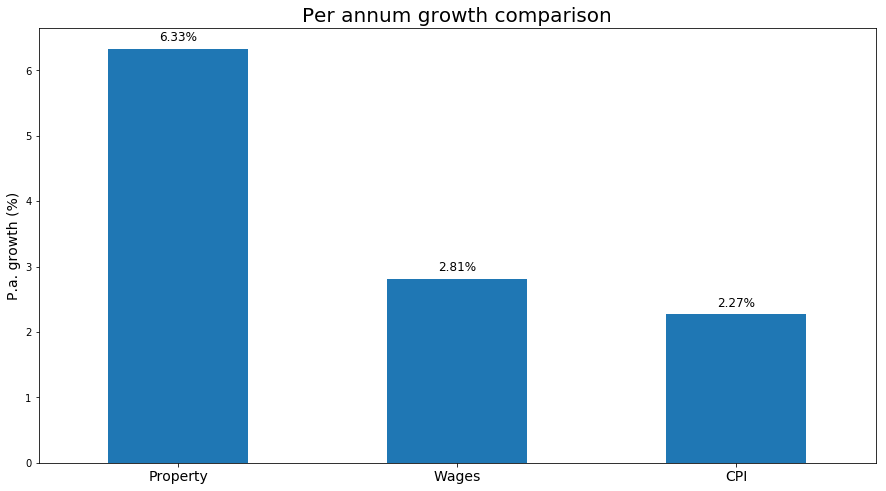

In [41]:
ax8 = merged_df.loc['P.a. growth (%)'].plot(kind='bar')
ax8.set_xticklabels(merged_df.columns,rotation=0,fontsize = 14)
plt.ylabel('P.a. growth (%)',fontsize=14)
plt.title('Per annum growth comparison',fontsize = 20)
ax8.figure.set_size_inches(15,8)

#This labels each bar respective to each bar's width and height.
tb.bar_labeller(ax8)

- Much like average growth, the above bar chart shows property far outgrowing wages and consumer prices. Similar to average growth, the amount that per annum growth in properties has outgrown wages and consumer prices is shown below.

In [42]:
pa_prop2wage = (prop_pa_growth / wage_pa_growth)*100
pa_prop2cpi = (prop_pa_growth / cpi_pa_growth)*100

print("Property outgrew wages by {0:.2f}%.".format(pa_prop2wage))
print("Property outgrew consumer prices by {0:.2f}%.".format(pa_prop2cpi))

Property outgrew wages by 224.82%.
Property outgrew consumer prices by 279.08%.


- Similar to average growth, the amount that properties has outgrown wages and consumer prices on a per annum basis is extremely high! 

#### 5.2.3: Total growth

- The final chart to plot is the total growth from the start of our time period (March 2009) to the end (March 2019). This is a simple calculation between two points that we'd generated from the 'generate_growth_rate_list' method from before.

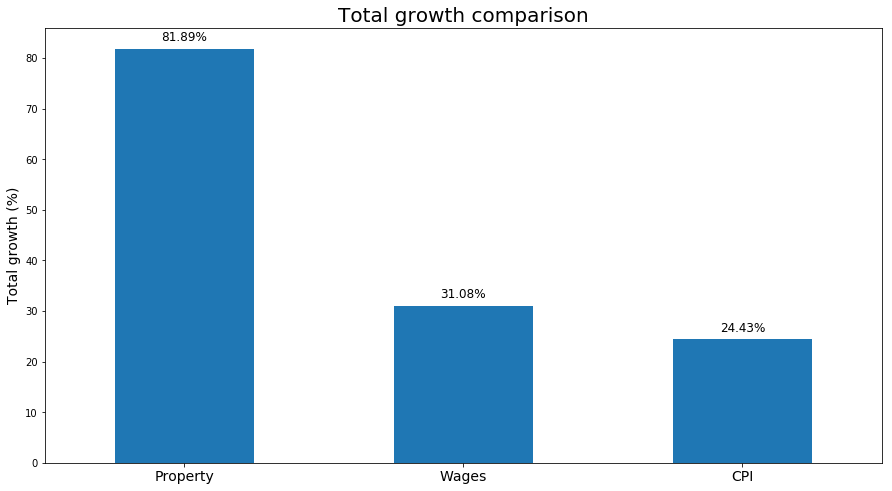

In [43]:
ax9 = merged_df.loc['Total growth (%)'].plot(kind='bar')
ax9.set_xticklabels(merged_df.columns,rotation=0,fontsize = 14)
plt.ylabel('Total growth (%)',fontsize=14)
plt.title('Total growth comparison',fontsize = 20)
ax9.figure.set_size_inches(15,8)

#This labels each bar respective to each bar's width and height.
tb.bar_labeller(ax9)

- Following the trend of average growth and per annum growth, we can see that property's total growth over the time period vastly outgrew wages and consumer prices. The amount that it outgrew both of these is calculated below.

In [44]:
tot_prop2wage = (prop_tot_growth[0] / wage_tot_growth[0])*100
tot_prop2cpi = (prop_tot_growth[0] / cpi_tot_growth[0])*100

print("Property outgrew wages by {0:.2f}%.".format(tot_prop2wage))
print("Property outgrew consumer prices by {0:.2f}%.".format(tot_prop2cpi))

Property outgrew wages by 263.48%.
Property outgrew consumer prices by 335.15%.


- Our final calculation shows that the total growth change was larger than average and per annum growth, with property outgrowing consumer prices by the largest amount, a whopping 3.4 times! 

## 6. Conclusion

- The question of 'are house prices in Sydney getting more expensive?' can be answered with a resounding yes. Not only have we seen house prices outgrow both wages and consumer prices, but we've seen the high magnitude of growth relative to them as well. With house prices outgrowing wages by 2.6 times on a total growth basis, housing has gotten far more expensive, and at the current growth rate, will become even more expensive and more and more people will be excluded from the housing market in Sydney if something isn't done. 


- With housing outgrowing consumer products by 3.4 times on a total growth basis, housing has also gotten far more expensive relative to pretty much anything else. We would probably need more data to see what proportion of the average person's budget is spent on housing, but I'd say it's fairly large, and perhaps the single biggest factor influencing the average person's spending. With housing getting more expensive, consumption of other goods will go down even if they are relatively cheap. 

    - Something else to note is that wages have actually outgrown consumer prices over the last 10 years, suggesting that food, travel, entertainment has gotten relatively cheaper, but the reason that more and more people are feeling the pinch is the extremely high level of price growth in housing.
    
    
- What can we learn from all of this? Don't feel like you're alone in thinking that housing has gotten more expensive, the data and facts support you!